In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
data = pd.read_csv('adult.csv')
data.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','class']
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [16]:
data_clean = data.replace(to_replace='?',value = np.nan)
data_clean.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [17]:
data_clean = data_clean.fillna(value = data_clean.median)
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  class           32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [18]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
col = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country','class']
for i in col:
    data_clean[i] = label.fit_transform(data_clean[i].astype(str))

In [19]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32560 non-null  int64
 1   workclass       32560 non-null  int32
 2   fnlwgt          32560 non-null  int64
 3   education       32560 non-null  int32
 4   education-num   32560 non-null  int64
 5   marital-status  32560 non-null  int32
 6   occupation      32560 non-null  int32
 7   relationship    32560 non-null  int32
 8   race            32560 non-null  int32
 9   sex             32560 non-null  int32
 10  capital-gain    32560 non-null  int64
 11  capital-loss    32560 non-null  int64
 12  hours-per-week  32560 non-null  int64
 13  native-country  32560 non-null  int32
 14  class           32560 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


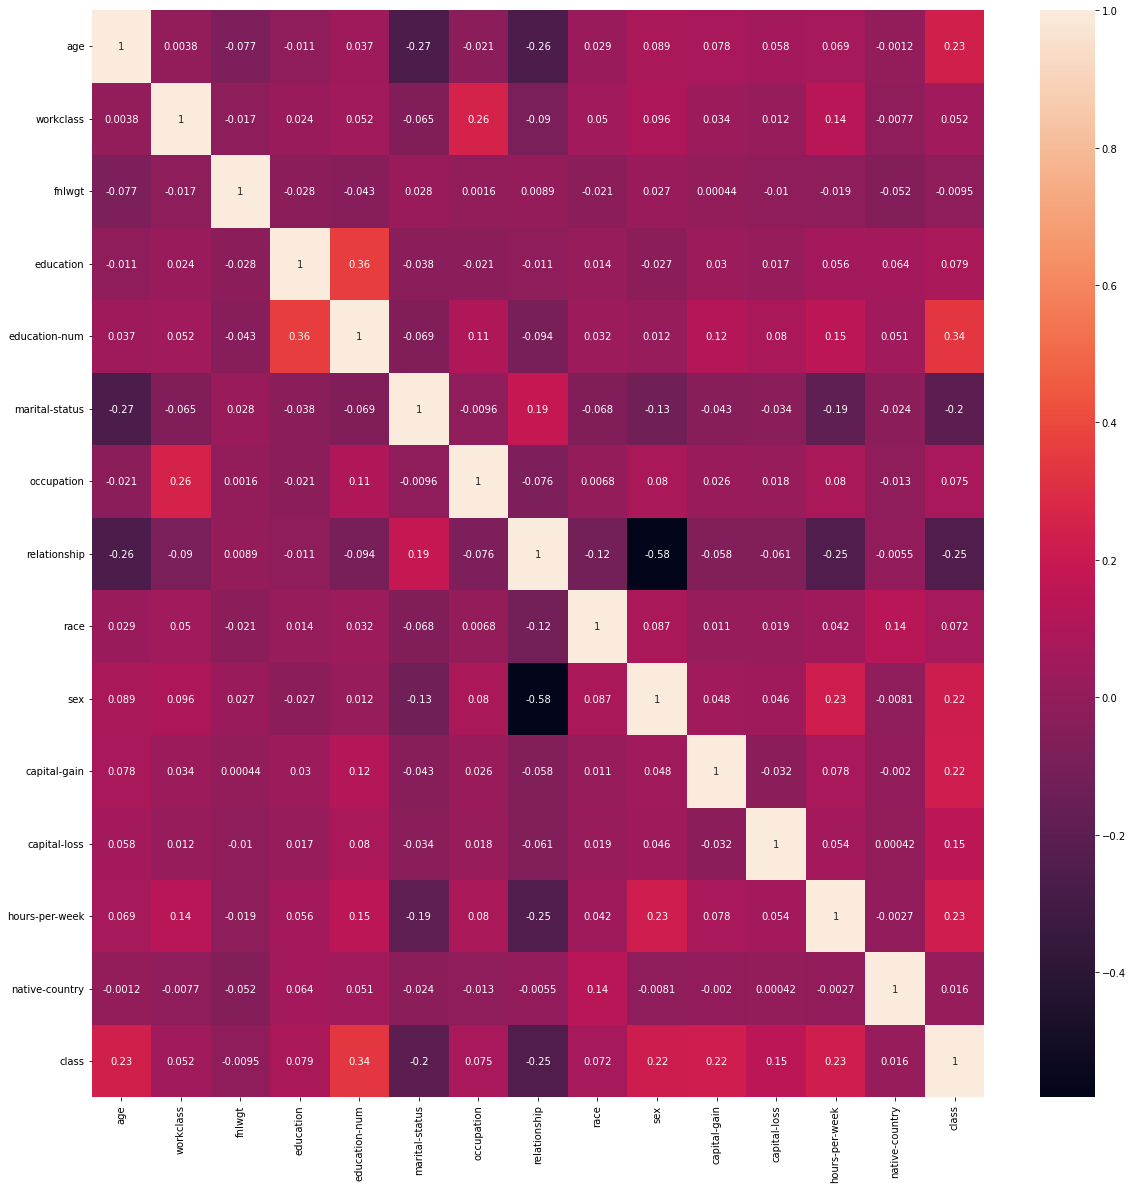

In [20]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(data_clean.corr(),annot=True)
plt.show()

In [21]:
drop_cols = ['native-country','workclass','fnlwgt','education','occupation','race']
data_clean = data_clean.drop(drop_cols,axis = 1)
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32560 non-null  int64
 1   education-num   32560 non-null  int64
 2   marital-status  32560 non-null  int32
 3   relationship    32560 non-null  int32
 4   sex             32560 non-null  int32
 5   capital-gain    32560 non-null  int64
 6   capital-loss    32560 non-null  int64
 7   hours-per-week  32560 non-null  int64
 8   class           32560 non-null  int32
dtypes: int32(4), int64(5)
memory usage: 1.7 MB


In [23]:
X = data_clean.values[:,:-1]
Y = data_clean.values[:,-1]
print(X.shape,Y.shape)

(32560, 8) (32560,)


In [25]:
u = np.mean(X,axis=0)
std = np.std(X,axis=0)
X = (X-u)/std

In [26]:
ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))
print(X.shape)

(32560, 9)


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state = 1)

In [28]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

def hypothesis(X,theta):
    return sigmoid(np.dot(X,theta))

def error(X,Y,theta):
    m = X.shape[0]
    y_ = hypothesis(X,theta)
    
    e = -1.0*np.mean(Y*np.log(y_)+(1-Y)*np.log(1-y_))

    return e

def gradient(X,Y,theta):
    m = X.shape[0]
    y_ = hypothesis(X,theta)

    grad = np.dot(X.T,(Y-y_))

    return grad/m

def gradient_descent(X,Y,lr=0.1):
    m,n = X.shape
    theta = np.zeros((n,))

    error_list = []
    for i in range(500):
        err = error(X,Y,theta)
        error_list.append(err)

        grad = gradient(X,Y,theta)

        theta = theta + lr*grad

    return theta,error_list

In [29]:
theta,error = gradient_descent(X,Y)

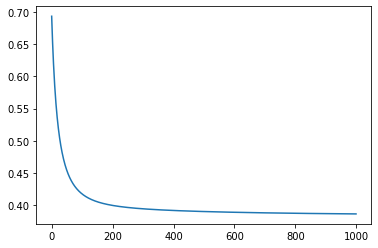

In [30]:
plt.plot(error)
plt.show()

In [31]:
def predict(X,theta):
    y = hypothesis(X,theta)
    output = np.zeros(y.shape)

    output[y>=0.5] = 1
    output = output.astype('int')

    return output

In [32]:
y_pred = predict(X,theta)
print(y_pred)

[0 0 0 ... 0 0 1]


In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred,Y,labels=[0,1])
true_pos = cm[0][0]
false_pos = cm[0][1]
false_neg = cm[1][0]
true_neg = cm[1][1]

In [34]:
accuracy = (true_pos+true_neg)/(true_pos+true_neg+false_pos+false_neg)
recal = true_pos/(true_pos+false_neg)
precsion = true_pos/(true_pos+false_pos)
F1_score = 2*((precsion*recal)/(precsion+recal))
print("Accuracy: ",accuracy)
print("Recal: ",recal)
print("Precsion: ",precsion)
print("F1 score: ",F1_score)

Accuracy:  0.824017199017199
Recal:  0.9434847688013269
Precsion:  0.8433194720665341
F1 score:  0.8905945698247223


[]

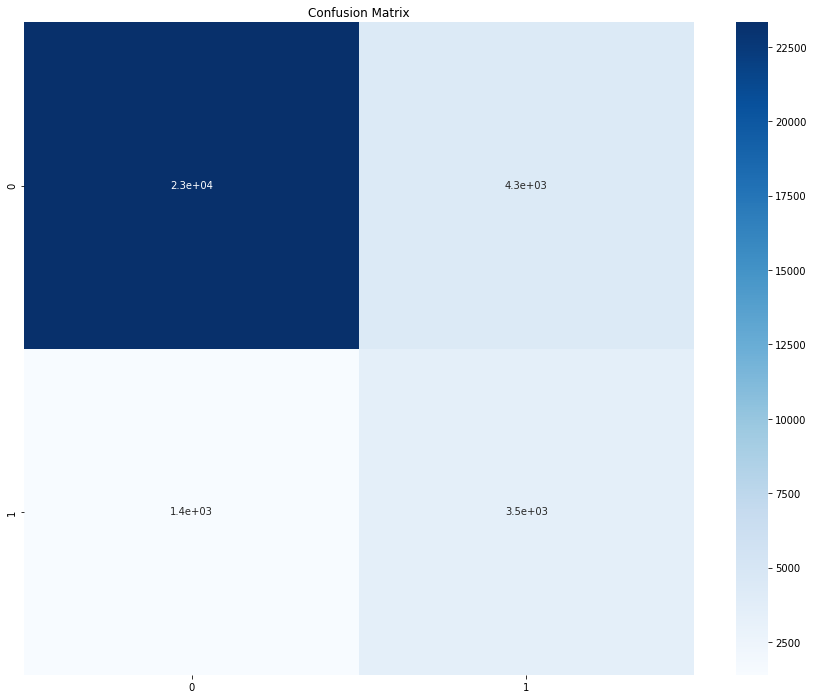

In [36]:
import seaborn as sns
plt.figure(figsize=(15,12))
plt.title("Confusion Matrix")
sns.heatmap(cm,annot=True,cmap=plt.cm.Blues)
plt.plot()

In [37]:
probabilites = hypothesis(X,theta)

In [39]:
from sklearn.metrics import roc_curve
fpr,tpr,threshols = roc_curve(Y,probabilites)

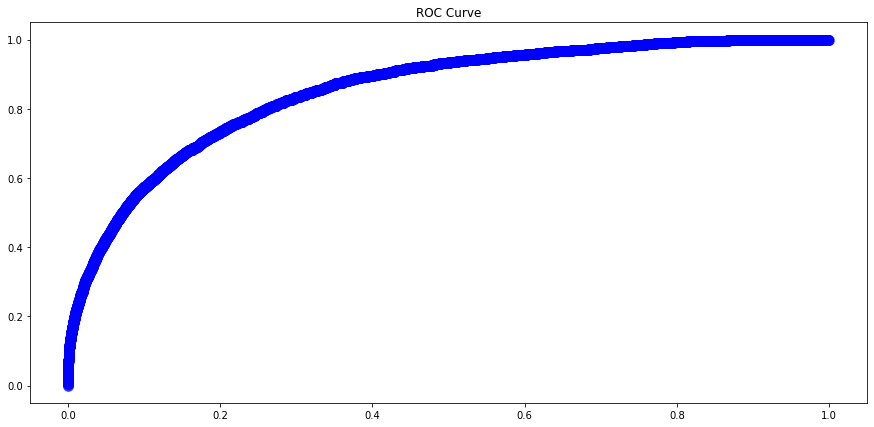

In [40]:
plt.figure(figsize=(15,7))
plt.scatter(fpr,tpr,s=100,alpha=0.5,color="blue",label="ROC Curve")
plt.title("ROC Curve")
plt.show()